#### EDA (Analisis exploratorio de datos)

* Para llevar a cabo el EDA implementaremos 5 pasos que nos permitirán obtener un conocimiento más adecuado de los datos.


- Paso 1. Entender los datos.
- Paso 2. Preparación de datos.
- Paso 3. Análisis Gráfico y de características.
- Paso 4. Relación entre características
- Paso 5. Tratamiento de Outliers

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importamos el archivo creado de las transformaciones iniciales
data= pd.read_csv('datos.csv')


#### Paso 1: Entender los datos

In [3]:
# Observamos el tamaño del dataset
data.shape

(45376, 22)

In [4]:
# Eliminamos genres, ya que se tiene su equivalente transformada
data=data.drop(['genres'],axis=1)

#observamos nuestras columnas
data.columns

Index(['budget', 'id', 'original_language', 'overview', 'popularity',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'vote_average', 'vote_count', 'release_year',
       'return', 'franquicia', 'generos', 'company', 'pais_prod', 'directors'],
      dtype='object')

In [5]:
#Observamos el tipo de datos del dataset
data.dtypes

budget               float64
id                     int64
original_language     object
overview              object
popularity           float64
release_date          object
revenue                int64
runtime              float64
spoken_languages      object
status                object
tagline               object
title                 object
vote_average         float64
vote_count           float64
release_year           int64
return               float64
franquicia            object
generos               object
company               object
pais_prod             object
directors             object
dtype: object

In [6]:
#realizamos un anilisis descriptivo de los datos numericos
data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,8.886000e+03,45376.000000,45376.000000,4.537600e+04,45130.000000,45376.000000,45376.000000,45376.000000,4.537600e+04
mean,2.161362e+07,108027.103094,2.926458,1.112133e+07,94.181675,5.624070,110.096439,1991.881193,6.600423e+02
std,3.431551e+07,112168.377996,6.009672,6.386574e+07,38.341059,1.915423,491.742894,24.055360,7.469329e+04
min,1.000000e+00,2.000000,0.000000,-2.147484e+09,0.000000,0.000000,0.000000,1874.000000,-9.061112e+00
25%,2.000000e+06,26385.750000,0.388840,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00
50%,8.000000e+06,59857.500000,1.130454,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00
75%,2.500000e+07,156533.500000,3.691695,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.000000e+00
max,3.800000e+08,469172.000000,547.488298,2.068224e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07


* a simple vista se observa posibles outliers en popularity, runtime, vote_count por sus valores tan alejados del 75% de los datos

### Paso 2: Preparacion de los datos

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             8886 non-null   float64
 1   id                 45376 non-null  int64  
 2   original_language  45365 non-null  object 
 3   overview           44435 non-null  object 
 4   popularity         45376 non-null  float64
 5   release_date       45376 non-null  object 
 6   revenue            45376 non-null  int64  
 7   runtime            45130 non-null  float64
 8   spoken_languages   45376 non-null  object 
 9   status             45296 non-null  object 
 10  tagline            20398 non-null  object 
 11  title              45376 non-null  object 
 12  vote_average       45376 non-null  float64
 13  vote_count         45376 non-null  float64
 14  release_year       45376 non-null  int64  
 15  return             45376 non-null  float64
 16  franquicia         448

* Cambiamos los valores nulos de budget por cero y eliminamos la columna tagline por que tenia muchos valores nulos
* Spoken _languages tambien sera removido

In [8]:

data.loc[data['budget'].isnull(), 'budget']=0
drop_list=['tagline','spoken_languages']
data=data.drop(drop_list,axis=1)


In [9]:
#
data['status'].value_counts()

status
Released           44936
Rumored              230
Post Production       97
In Production         19
Planned               13
Canceled               1
Name: count, dtype: int64

In [10]:
#observamos si hay valores duplicados
data.loc[data.duplicated()]

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,release_year,return,franquicia,generos,company,pais_prod,directors
1463,0.0,105045,de,"East-Berlin, 1961, shortly after the erection ...",0.122178,1995-02-16,0,115.0,Released,The Promise,5.0,1.0,1995,0.0,NaN,"['Drama', 'Romance']","['Studio Babelsberg', 'Centre National de la C...",['Germany'],['Margarethe von Trotta']
9160,0.0,5511,fr,Hitman Jef Costello is a perfectionist who alw...,9.091288,1967-10-25,39481,105.0,Released,Le Samouraï,7.9,187.0,1967,0.0,NaN,"['Crime', 'Drama', 'Thriller']","['Fida cinematografica', 'Compagnie Industriel...","['France', 'Italy']",['Jean-Pierre Melville']
9322,0.0,23305,en,"In feudal India, a warrior (Khan) who renounce...",1.967992,2001-09-23,0,86.0,Released,The Warrior,6.3,15.0,2001,0.0,NaN,"['Adventure', 'Animation', 'Drama', 'Action', ...",['Filmfour'],"['France', 'Germany', 'India', 'United Kingdom']",['Asif Kapadia']
13370,0.0,141971,fi,Recovering from a nail gun shot to the head an...,0.411949,2008-12-26,0,108.0,Released,Blackout,6.7,3.0,2008,0.0,NaN,"['Thriller', 'Mystery']",['Filmiteollisuus Fine'],['Finland'],['JP Siili']
16757,0.0,141971,fi,Recovering from a nail gun shot to the head an...,0.411949,2008-12-26,0,108.0,Released,Blackout,6.7,3.0,2008,0.0,NaN,"['Thriller', 'Mystery']",['Filmiteollisuus Fine'],['Finland'],['JP Siili']


* Tenemos duplicados por titulo, pero se observa que puede haber peliculas con el mismo nombre pero son producciones diferentes (remakes)

In [11]:

data.loc[data.duplicated(subset=['title'])]

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,release_year,return,franquicia,generos,company,pais_prod,directors
886,2238813.0,6620,en,Linus and David Larrabee are the two sons of a...,7.359741,1954-09-28,10000000,113.0,Released,Sabrina,7.4,284.0,1954,4.466653,NaN,"['Comedy', 'Drama', 'Romance']",['Paramount Pictures'],['United States of America'],['Billy Wilder']
928,0.0,85638,en,"In Puritan Boston, seamstress Hester Prynne is...",0.284522,1926-08-09,0,115.0,Released,The Scarlet Letter,8.3,4.0,1926,0.000000,NaN,['Drama'],['Metro-Goldwyn-Mayer (MGM)'],['United States of America'],['Victor Sjöström']
1294,0.0,11349,en,Sam Bowden witnesses a rape committed by Max C...,7.583191,1962-04-12,0,105.0,Released,Cape Fear,7.2,125.0,1962,0.000000,NaN,"['Drama', 'Thriller']",['Melville-Talbot Productions'],['United States of America'],['J. Lee Thompson']
1463,0.0,105045,de,"East-Berlin, 1961, shortly after the erection ...",0.122178,1995-02-16,0,115.0,Released,The Promise,5.0,1.0,1995,0.000000,NaN,"['Drama', 'Romance']","['Studio Babelsberg', 'Centre National de la C...",['Germany'],['Margarethe von Trotta']
1642,80000000.0,9922,en,"In 2013 there are no highways, no I-ways, no d...",6.537407,1997-12-25,17626234,177.0,Released,The Postman,6.1,306.0,1997,0.220328,The Postman Collection,"['Drama', 'Adventure']","['Tig Productions', 'Warner Bros.']",['United States of America'],['Kevin Costner']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45332,0.0,52103,zh,Little pocket thief Wu never got away from the...,0.350365,1997-01-01,0,105.0,Released,Pickpocket,7.2,13.0,1997,0.000000,NaN,"['Drama', 'Foreign']","['Hu Tong Communications', 'Radiant Advertisin...","['China', 'Hong Kong']",['Anton Sivers']
45364,0.0,404604,hi,The bliss of a biology teacher’s family life i...,1.559596,2017-07-07,0,146.0,Released,Mom,6.6,14.0,2017,0.000000,NaN,"['Crime', 'Drama', 'Thriller']","['Mad Films', 'Third Eye Pictures']",['India'],['Georges Méliès']
45365,0.0,420346,en,The Morning After is a feature film that consi...,0.139936,2015-01-11,0,79.0,Released,The Morning After,4.0,2.0,2015,0.000000,NaN,"['Comedy', 'Drama']","['Oops Doughnuts Productions', 'He and She Fil...",['United States of America'],['Georges Méliès']
45371,0.0,30840,en,"Yet another version of the classic epic, with ...",5.683753,1991-05-13,0,104.0,Released,Robin Hood,5.7,26.0,1991,0.000000,NaN,"['Drama', 'Action', 'Romance']","['Westdeutscher Rundfunk (WDR)', 'Working Titl...","['Canada', 'Germany', 'United Kingdom', 'Unite...",['Georges Méliès']


In [12]:
#observamos por ID
data.loc[data.duplicated(subset=['id'])]

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,release_year,return,franquicia,generos,company,pais_prod,directors
1463,0.0,105045,de,"East-Berlin, 1961, shortly after the erection ...",0.122178,1995-02-16,0,115.0,Released,The Promise,5.0,1.0,1995,0.000000,NaN,"['Drama', 'Romance']","['Studio Babelsberg', 'Centre National de la C...",['Germany'],['Margarethe von Trotta']
9160,0.0,5511,fr,Hitman Jef Costello is a perfectionist who alw...,9.091288,1967-10-25,39481,105.0,Released,Le Samouraï,7.9,187.0,1967,0.000000,NaN,"['Crime', 'Drama', 'Thriller']","['Fida cinematografica', 'Compagnie Industriel...","['France', 'Italy']",['Jean-Pierre Melville']
9322,0.0,23305,en,"In feudal India, a warrior (Khan) who renounce...",1.967992,2001-09-23,0,86.0,Released,The Warrior,6.3,15.0,2001,0.000000,NaN,"['Adventure', 'Animation', 'Drama', 'Action', ...",['Filmfour'],"['France', 'Germany', 'India', 'United Kingdom']",['Asif Kapadia']
12061,1600000.0,14788,en,Set against the backdrop of a decaying Midwest...,3.008299,2005-09-03,0,73.0,Released,Bubble,6.4,36.0,2005,0.000000,NaN,"['Drama', 'Crime', 'Mystery']","['Magnolia Pictures', 'Extension 765']",['United States of America'],['Steven Soderbergh']
13370,0.0,141971,fi,Recovering from a nail gun shot to the head an...,0.411949,2008-12-26,0,108.0,Released,Blackout,6.7,3.0,2008,0.000000,NaN,"['Thriller', 'Mystery']",['Filmiteollisuus Fine'],['Finland'],['JP Siili']
15067,4.0,22649,en,British nurse Catherine Barkley (Helen Hayes) ...,2.411191,1932-12-08,25,89.0,Released,A Farewell to Arms,6.2,29.0,1932,6.250000,NaN,"['Drama', 'Romance', 'War']",['Paramount Pictures'],['United States of America'],['Frank Borzage']
15758,2500.0,13209,fa,"Since women are banned from soccer matches, Ir...",1.529879,2006-05-26,0,93.0,Released,Offside,6.7,27.0,2006,0.000000,NaN,"['Drama', 'Comedy', 'Foreign']",['Jafar Panahi Film Productions'],['Iran'],['Jafar Panahi']
16757,0.0,141971,fi,Recovering from a nail gun shot to the head an...,0.411949,2008-12-26,0,108.0,Released,Blackout,6.7,3.0,2008,0.000000,NaN,"['Thriller', 'Mystery']",['Filmiteollisuus Fine'],['Finland'],['JP Siili']
20821,40000000.0,77221,en,"On the Arabian Peninsula in the 1930s, two war...",6.475665,2011-12-21,5446000,130.0,Released,Black Gold,5.9,77.0,2011,0.136150,NaN,"['Adventure', 'Drama']","['France 2 Cinéma', 'Quinta Communications', '...","['France', 'Italy', 'Qatar', 'Tunisia']","['Robert Amram', 'Rolf Forsberg']"
20877,0.0,109962,en,Two literary women compete for 20 years: one w...,10.396878,1981-09-23,0,115.0,Released,Rich and Famous,4.9,7.0,1981,0.000000,NaN,['Drama'],"['Metro-Goldwyn-Mayer (MGM)', 'Jaquet']",['United States of America'],['Jeff Smith']


In [13]:
#consultamos por id. observamos que por este campo si encontramos registros repetidos en su totalidad
data.query('id==97995')

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,release_year,return,franquicia,generos,company,pais_prod,directors
13940,0.0,97995,en,"After breaking a mirror in his home, superstit...",0.141558,1921-02-06,0,62.0,Released,Seven Years Bad Luck,5.6,4.0,1921,0.0,NaN,['Comedy'],['Max Linder Productions'],['United States of America'],['Max Linder']
40213,0.0,97995,en,"After breaking a mirror in his home, superstit...",0.141558,1921-02-06,0,62.0,Released,Seven Years Bad Luck,5.6,4.0,1921,0.0,NaN,['Comedy'],['Max Linder Productions'],['United States of America'],['Rodney McDonald']


* Se Eliminan los campos con ID´s repetidos, ya que se puede observar que sus valores son iguales en la totalidad

In [14]:

data = data.loc[~data.duplicated(subset=['id'])] .reset_index(drop=True).copy()
data

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,title,vote_average,vote_count,release_year,return,franquicia,generos,company,pais_prod,directors
0,30000000.0,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033,81.0,Released,Toy Story,7.7,5415.0,1995,12.451801,Toy Story Collection,"['Animation', 'Comedy', 'Family']",['Pixar Animation Studios'],['United States of America'],['John Lasseter']
1,65000000.0,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249,104.0,Released,Jumanji,6.9,2413.0,1995,4.043035,NaN,"['Adventure', 'Fantasy', 'Family']","['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],['Joe Johnston']
2,0.0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0,101.0,Released,Grumpier Old Men,6.5,92.0,1995,0.000000,Grumpy Old Men Collection,"['Romance', 'Comedy']","['Warner Bros.', 'Lancaster Gate']",['United States of America'],['Howard Deutch']
3,16000000.0,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156,127.0,Released,Waiting to Exhale,6.1,34.0,1995,5.090760,NaN,"['Comedy', 'Drama', 'Romance']",['Twentieth Century Fox Film Corporation'],['United States of America'],['Forest Whitaker']
4,0.0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911,106.0,Released,Father of the Bride Part II,5.7,173.0,1995,0.000000,Father of the Bride Collection,['Comedy'],"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],['Charles Shyer']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45341,0.0,30840,en,"Yet another version of the classic epic, with ...",5.683753,1991-05-13,0,104.0,Released,Robin Hood,5.7,26.0,1991,0.000000,NaN,"['Drama', 'Action', 'Romance']","['Westdeutscher Rundfunk (WDR)', 'Working Titl...","['Canada', 'Germany', 'United Kingdom', 'Unite...",['Georges Méliès']
45342,0.0,111109,tl,An artist struggles to finish his work while a...,0.178241,2011-11-17,0,360.0,Released,Century of Birthing,9.0,3.0,2011,0.000000,NaN,['Drama'],['Sine Olivia'],['Philippines'],['Robert Gardner']
45343,0.0,67758,en,"When one of her hits goes wrong, a professiona...",0.903007,2003-08-01,0,90.0,Released,Betrayal,3.8,6.0,2003,0.000000,NaN,"['Action', 'Drama', 'Thriller']",['American World Pictures'],['United States of America'],['Ravi Udyawar']
45344,0.0,227506,en,"In a small town live two brothers, one a minis...",0.003503,1917-10-21,0,87.0,Released,Satan Triumphant,0.0,0.0,1917,0.000000,NaN,[],['Yermoliev'],['Russia'],['Shanra J. Kehl']


### Paso 3: Analisis grafico y de caracteristicas

In [29]:
#Analisis de producciones por año
pd.reset_option('display.max_rows')
data['release_year'].value_counts()

release_year
2014    1973
2015    1904
2013    1887
2012    1721
2011    1666
        ... 
2020       1
1887       1
1878       1
1874       1
1883       1
Name: count, Length: 135, dtype: int64

Text(0, 0.5, 'Cantidad Peliculas')

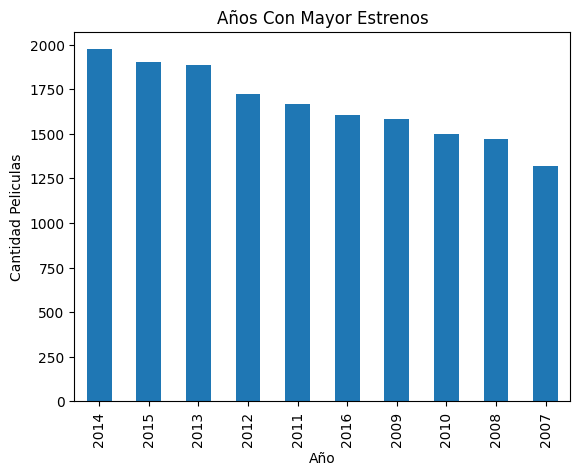

In [16]:
#Este grafico de barras nos permite observar el aumento en producciones en la decada del 2010 a 2020
ax = data['release_year'].value_counts().head(10).plot(kind='bar', title='Años Con Mayor Estrenos')
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad Peliculas')

(0.0, 1300.0)

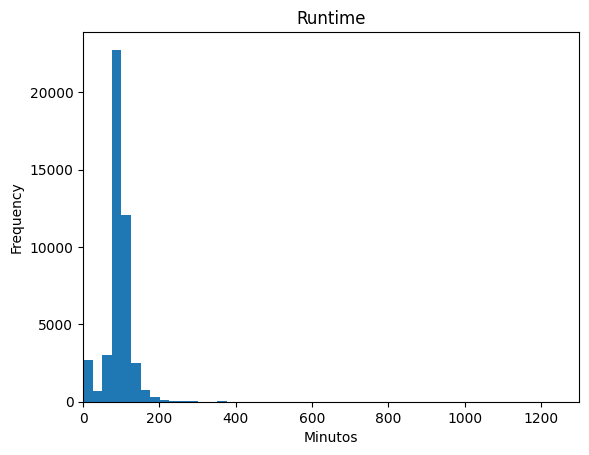

In [25]:
# Este histograma permite observar como esta distribuido el tiempo de duracion de las peliculas
ax = data['runtime'].plot(kind='hist',
                          bins=50,
                          title='Runtime')
ax.set_xlabel('Minutos')
ax.set_xlim(0,1300)

Text(0, 0.5, 'Tipo de Lenguajes')

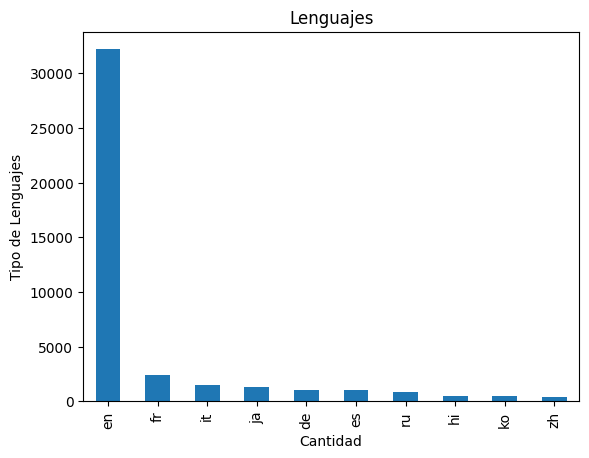

In [52]:
#Este grafico de barras nos permite observar el aumento en producciones en la decada del 2010 a 2020
ax = data['original_language'].value_counts().head(10).plot(kind='bar', title='Lenguajes')
ax.set_xlabel('Cantidad')
ax.set_ylabel('Tipo de Lenguajes')

(0.0, 10.0)

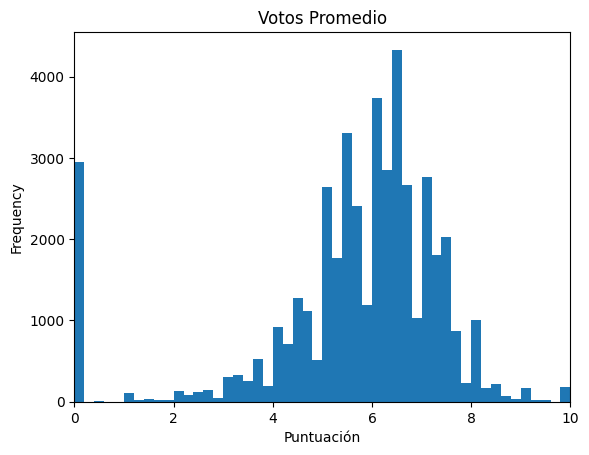

In [55]:
# Este histograma permite observar como esta distribuido el tiempo de duracion de las peliculas
ax = data['vote_average'].plot(kind='hist',
                          bins=50,
                          title='Votos Promedio')
ax.set_xlabel('Puntuación')
ax.set_xlim(0,10)

### Paso 4: Relacion entre caracteristicas 

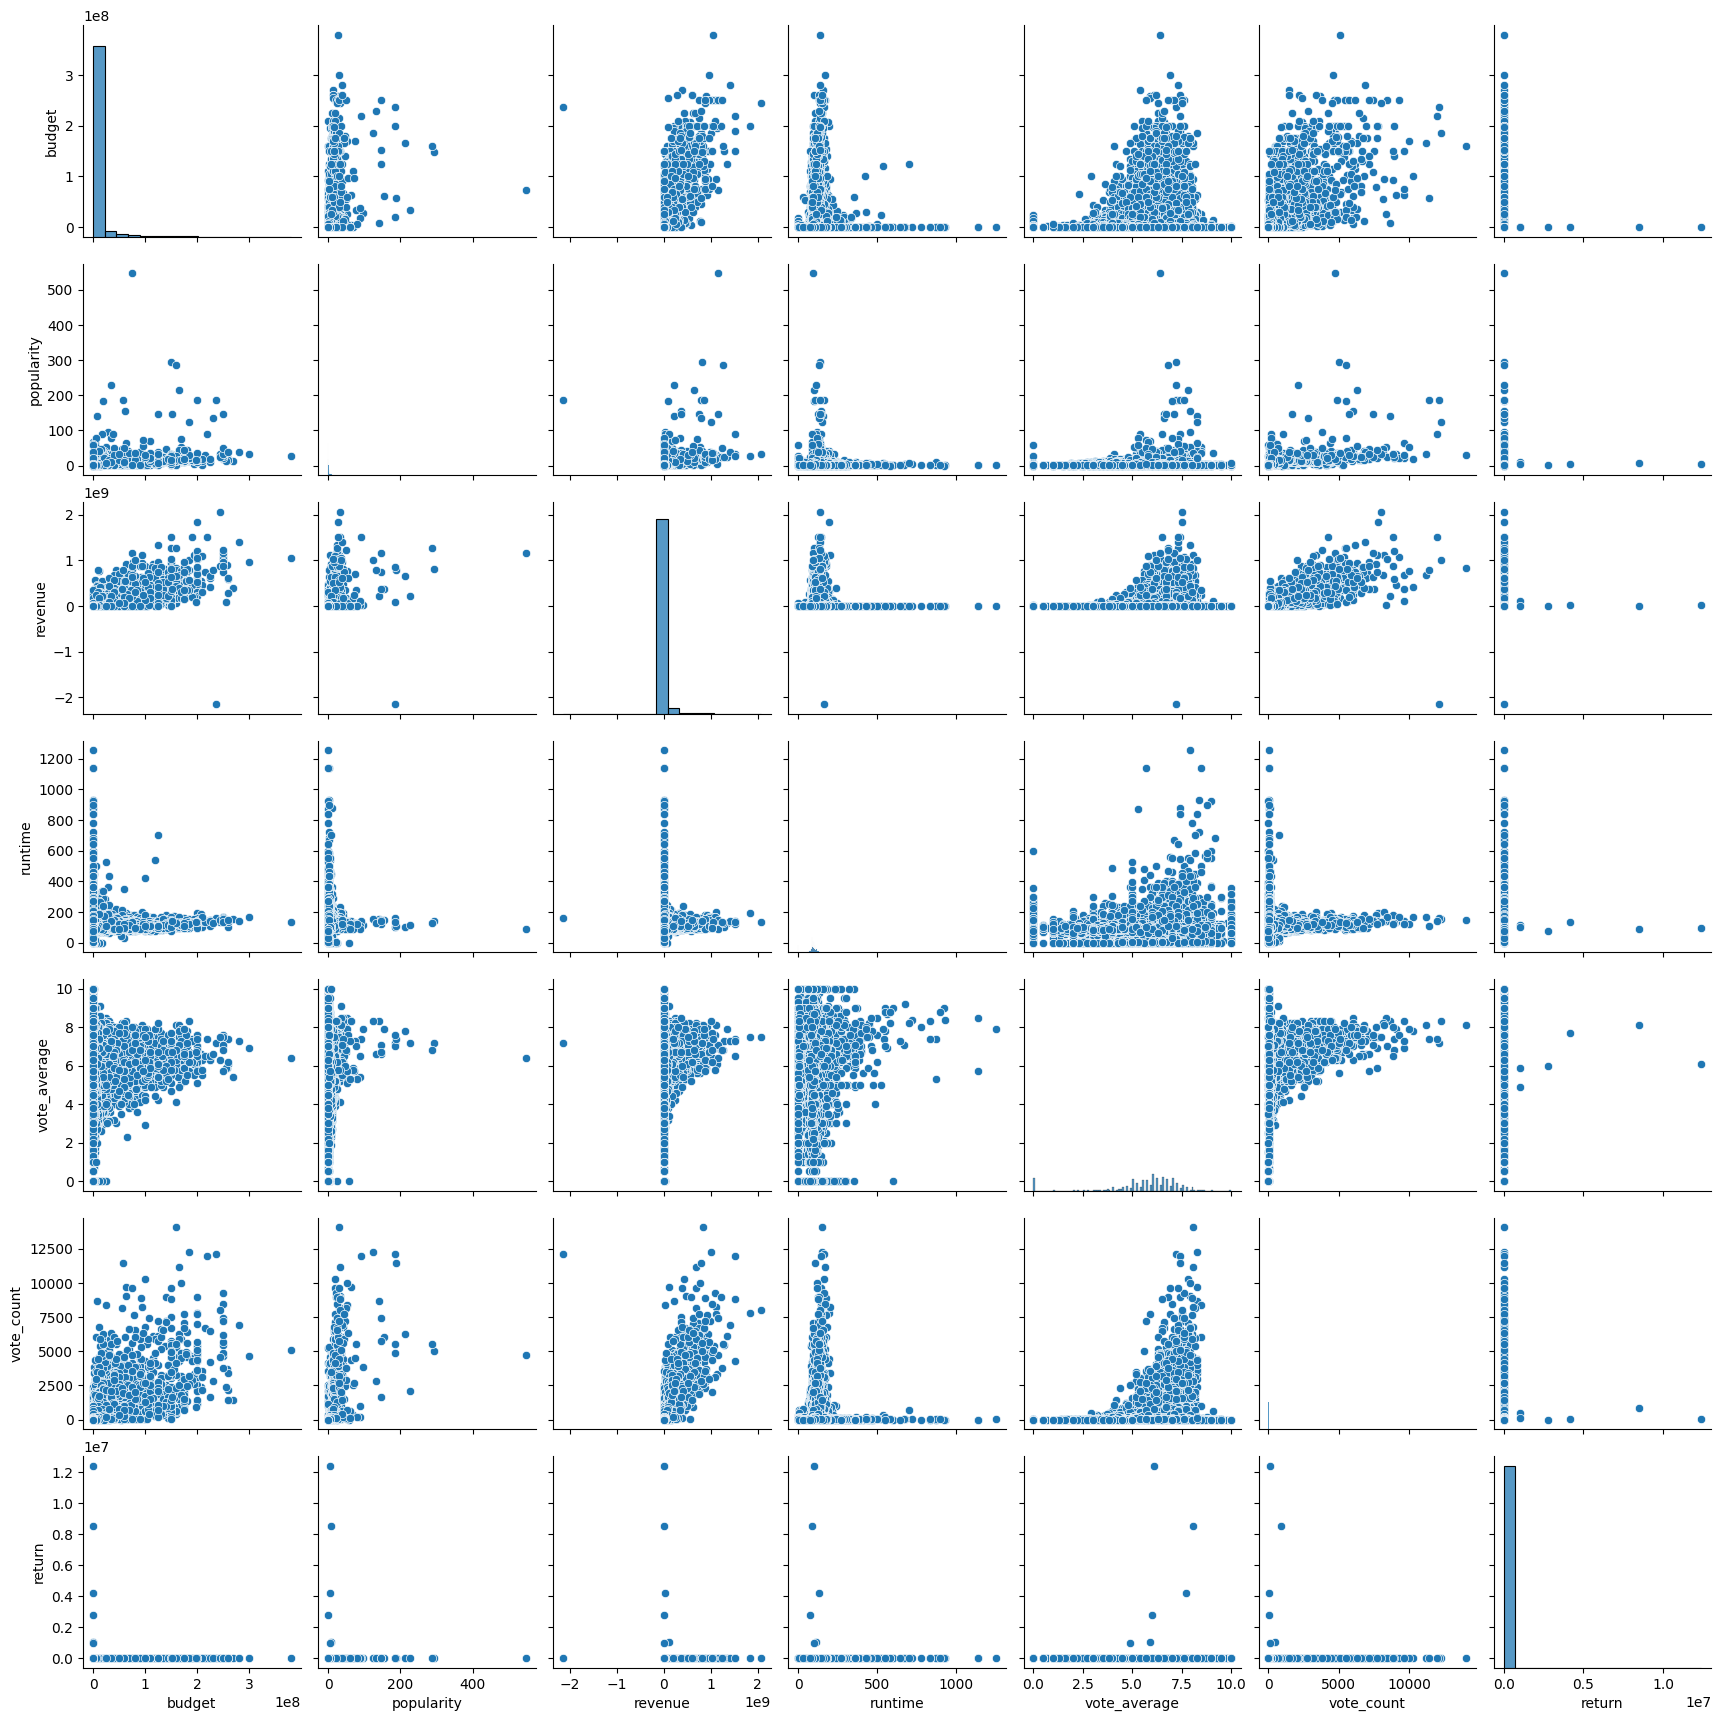

In [34]:
# pairplot de variables numericas
sns.pairplot(data, vars=['budget','popularity','revenue','runtime','vote_average','vote_count','return'])

In [57]:
#correlacion entre la variables numericas
data_num=data[['budget','popularity','revenue','runtime','vote_average','vote_count','return']]
data_num.corr()

,budget,popularity,revenue,runtime,vote_average,vote_count,return
budget,1.000000,0.449604,0.752387,0.134710,0.073167,0.676669,-0.002137
popularity,0.449604,1.000000,0.458730,0.129648,0.153731,0.559955,0.003215
revenue,0.752387,0.458730,1.000000,0.101804,0.083101,0.777109,0.000812
runtime,0.134710,0.129648,0.101804,1.000000,0.156778,0.113532,0.000892
vote_average,0.073167,0.153731,0.083101,0.156778,1.000000,0.123605,0.005591
vote_count,0.676669,0.559955,0.777109,0.113532,0.123605,1.000000,0.003597
return,-0.002137,0.003215,0.000812,0.000892,0.005591,0.003597,1.000000


<Axes: >

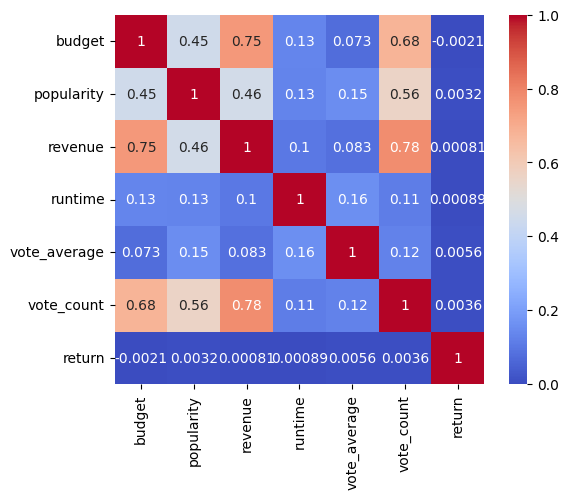

In [64]:
sns.heatmap(data_num.corr(), cbar=True, square=True, annot=True, cmap='coolwarm')

In [70]:
#Numero de valores unicos de algunos datos tipo texto

num_languages=data['original_language'].nunique()
num_status=data['status'].nunique()
num_title= data['title'].nunique()

print('Numero de Lenguajes:',num_languages,'  Numero de Status:',num_status, '  Numero de Titulos Unicos:',num_title)

Numero de Lenguajes: 89   Numero de Status: 6   Numero de Titulos Unicos: 42196


In [71]:
data.isnull().sum()

budget                   0
id                       0
original_language       11
overview               941
popularity               0
release_date             0
revenue                  0
runtime                246
status                  80
title                    0
vote_average             0
vote_count               0
release_year             0
return                   0
franquicia           40861
generos                  0
company                  0
pais_prod                0
directors                0
dtype: int64

In [72]:
#Guardamos el nuevo dataset
#data.to_csv('data.csv', index=False)

## Pre-procesamiento del Dataset

- En esta parte vamos a preparar nuestros dataset para elegir los parametros que permitan desarrollar nuestro modelo de recomendacion.

In [12]:
data=pd.read_csv('data.csv')

* los datos elegidos para el modelo en primera instancia serán: genero, id, title, overview, directors, vote_average y franquicia
* aunque la franquicia tiene muchos datos nulos.

In [13]:
# Elegimos las columnas mas significativas en un principio
data_ml= data[['id','overview','title','vote_average','franquicia','generos','company','directors']]
#observamos los valore nulos
data_ml.isnull().sum()

id                  0
overview          941
title               0
vote_average        0
franquicia      40861
generos             0
company             0
directors           0
dtype: int64

In [14]:
#Quitamos lo valores nulos de overview ya que consideramos este campo muy importante para el modelo
data_ml = data_ml.dropna(subset=['overview'])
data_ml.isnull().sum()

id                  0
overview            0
title               0
vote_average        0
franquicia      39979
generos             0
company             0
directors           0
dtype: int64

In [15]:
#Creamos una lista compuesta por cada palabra en el overview
data_ml['overview']= data_ml['overview'].apply(lambda x:  x.split())
data_ml.head(1)

,id,overview,title,vote_average,franquicia,generos,company,directors
0,862,"[Led, by, Woody,, Andy's, toys, live, happily,...",Toy Story,7.7,Toy Story Collection,"['Animation', 'Comedy', 'Family']",['Pixar Animation Studios'],['John Lasseter']


In [16]:
#Quitamos los espacios entre palabras, para que no haya similitud entre un EJ: John Lenon y John Price
data_ml['company']=data_ml['company'].apply(lambda x:x.replace(" ",""))
data_ml['generos']=data_ml['generos'].apply(lambda x:x.replace(" ",""))
data_ml['directors']=data_ml['directors'].apply(lambda x:x.replace(" ",""))
data_ml.head(1)

,id,overview,title,vote_average,franquicia,generos,company,directors
0,862,"[Led, by, Woody,, Andy's, toys, live, happily,...",Toy Story,7.7,Toy Story Collection,"['Animation','Comedy','Family']",['PixarAnimationStudios'],['JohnLasseter']


In [17]:
#Convertimos a string para concatenar las cadenas de texto
data_ml['generos']=data_ml['generos'].apply(lambda x: eval(str(x)))
data_ml['company']=data_ml['company'].apply(lambda x: eval(str(x)))
data_ml['directors']=data_ml['directors'].apply(lambda x: eval(str(x)))
#Creamos un campo nuevo con los valores concatenados
data_ml['tags']=data_ml['overview']+data_ml['generos'] + data_ml['company'] + data_ml['directors']
data_ml.head(1)

,id,overview,title,vote_average,franquicia,generos,company,directors,tags
0,862,"[Led, by, Woody,, Andy's, toys, live, happily,...",Toy Story,7.7,Toy Story Collection,"[Animation, Comedy, Family]",[PixarAnimationStudios],[JohnLasseter],"[Led, by, Woody,, Andy's, toys, live, happily,..."


In [18]:
#Creamos nuevo dataframe solo con las columnas de interes
data_fn= data_ml[['id','title','tags']]
data_fn.head(1)

,id,title,tags
0,862,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,..."


In [19]:
#rehacemos cada campo, como una solo cadena de texto, y no una lista de ellos
data_fn['tags']=data_fn['tags'].apply(lambda x:" ".join(x) )

#pasamos a minusculas
data_fn['tags']=data_fn['tags'].apply(lambda x: x.lower())

data_fn['tags'][0]

C:\Users\Yeferson\AppData\Local\Temp\ipykernel_3236\3907769542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fn['tags']=data_fn['tags'].apply(lambda x:" ".join(x) )
C:\Users\Yeferson\AppData\Local\Temp\ipykernel_3236\3907769542.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fn['tags']=data_fn['tags'].apply(lambda x: x.lower())


"led by woody, andy's toys live happily in his room until andy's birthday brings buzz lightyear onto the scene. afraid of losing his place in andy's heart, woody plots against buzz. but when circumstances separate buzz and woody from their owner, the duo eventually learns to put aside their differences. animation comedy family pixaranimationstudios johnlasseter"

In [20]:
#Creamos una funcion que cambia los verbos conjugados por verbos sin conjugar, para ayudar en la similitud de tags
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def stem(text):
    y = []

    for i in text.split():
        y.append(ps.stem(i))

    return " ".join(y)

In [21]:
#aplicamos la funcion a la columna tags
data_fn['tags']=data_fn['tags'].apply(stem)

C:\Users\Yeferson\AppData\Local\Temp\ipykernel_3236\3046807212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fn['tags']=data_fn['tags'].apply(stem)


* Al final obtenemos un nuevo dataset, con solo 3 variables, 'id', 'title' , 'tags'.
* tags sera nuestra columna de interés, la cual tiene un pequeño resumen de la pelicula, compañía productora, géneros y directores

In [ ]:
#Finalizamos con el preprocesamiento del dataset
data_fn.to_csv('modelo.csv', index=False)
